In [4]:
# Libraries for Scientific Computing
import numpy as np
import pyquaternion as pyQ

# Libraries for graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import juggle_axes

import scipy.integrate

### Mechanics

In [136]:
np.empty([len(masses), 3])

array([[0.98729127, 1.        , 0.42010775],
       [0.98729127, 1.        , 0.42010775],
       [1.01172186, 1.        , 0.35728624],
       [1.01172186, 1.        , 0.35728624],
       [1.01870202, 1.        , 0.57939881],
       [1.01870202, 1.        , 0.57939881],
       [0.9803111 , 1.        , 0.64222032],
       [0.9803111 , 1.        , 0.64222032],
       [0.02792067, 0.5       , 0.88845028],
       [0.02792067, 0.5       , 0.88845028]])

In [139]:
class deformableBody:
    def __init__(self, r_0, masses, p_0, rot, body_lines):
        self.r_0 = r_0
        self.masses = masses
        self.p_0 = p_0
        self.rot = rot
        self.body_lines = body_lines
        self.r = np.copy(self.r_0)
        self.particles = 0
        self.n = len(self.masses)
        
    def translation_CM(self):
        r_cm = physics.CM(self, self.r_0, self.masses)
        self.r -= r_cm
        

        
class physics:
    
    ##### Inertial Tensor
    ### Input:  r -> positions;
    ###         m -> masses from the body;
    ### Output: I -> Matrix representing the Inertial Tensor
    ##### Gil Miranda - last revision 15/09/2019
    
    def get_InertialTensor(self, r, m):
        I = np.empty((3,3))
        for i in range(len(m)):
            I[0][0] += m[i]*(r[i][1]*r[i][1] + r[i][2]*r[i][2])
            I[1][1] += m[i]*(r[i][0]*r[i][0] + r[i][2]*r[i][2])
            I[2][2] += m[i]*(r[i][0]*r[i][0] + r[i][1]*r[i][1])

            I[0][1] -= m[i]*r[i][0]*r[i][1]
            I[0][2] -= m[i]*r[i][0]*r[i][2]
            I[1][2] -= m[i]*r[i][1]*r[i][2]
        I[1][0] = I[0][1]
        I[2][0] = I[0][2]
        I[2][1] = I[1][2]
        return I
    
    def get_InternalAngularMomentum(self, Q, v, masses):
        s = np.empty(3)
        for (i,m) in enumerate(masses):
            s = s + m*np.cross(Q[i], v[i])
        return s
    
    def CM(self, r, masses):
        cm = np.zeros(3)
        for i in range(len(r)):
            cm[0] += masses[i] * r[i][0]
            cm[1] += masses[i] * r[i][1]
            cm[2] += masses[i] * r[i][2]
        total_m = sum(masses)
        cm *= (1/total_m)
        return cm
    
    def particles(self, rot, t):
        part = np.empty([len(rot), 3])
        for i, p in enumerate(part):
            p = rot[i](t)
        return part
    
    def eqOfMotion(x, t, rot, m):
        # q -> quaternion for rotation
        # p -> body angular momentum
        q = pyQ.Quaternion(x[:4])
        p = x[4:]
        # Position
        pos = self.particles(self, rot, t)

        #Velocities
        ep = 1e-7
        v = (particles(t+ep, rot) - particles(t-ep, rot))/(2*ep)

        # Tensor of Inertia
        I = self.get_InertialTensor(pos, m)
        Iinv = np.linalg.inv(I)

        # Angular Momentum
        L = self.get_InternalAngularMomentum(pos, v, m)
        dumb = np.dot(Iinv, (p-L))
        dp_dt = np.cross(p,dumb)

        omega_i = np.dot(Iinv, (p-L))
        omega = pyQ.Quaternion(0, omega_i[0], omega_i[1], omega_i[2])
        dq_dt = 0.5 * q * omega
        return [dq_dt[0],dq_dt[1],dq_dt[2],dq_dt[3]] + [dp_dt[0], dp_dt[1], dp_dt[2]]

In [132]:
def mechanics(r_0, r, masses, q_0, p_0, t, tmax, n, body_lines, name = 'CubeQ'):    
    
    ## Identity Rotation
    q_0 = [q for q in q_0]
    positions = np.empty([len(masses), 3, n])
    
    ### Physics
    
    
    ##### Inertial Tensor
    ### Input:  r -> positions;
    ###         m -> masses from the body;
    ### Output: I -> Matrix representing the Inertial Tensor
    ##### Gil Miranda - last revision 15/09/2019

    def getInertialTensor(r, m):
        I = np.zeros((3,3))
        for i in range(len(m)):
            I[0][0] += m[i]*(r[i][1]*r[i][1] + r[i][2]*r[i][2])
            I[1][1] += m[i]*(r[i][0]*r[i][0] + r[i][2]*r[i][2])
            I[2][2] += m[i]*(r[i][0]*r[i][0] + r[i][1]*r[i][1])

            I[0][1] -= m[i]*r[i][0]*r[i][1]
            I[0][2] -= m[i]*r[i][0]*r[i][2]
            I[1][2] -= m[i]*r[i][1]*r[i][2]
        I[1][0] = I[0][1]
        I[2][0] = I[0][2]
        I[2][1] = I[1][2]
        return I

    ## ----------------------Rever este-----------------------------------------

    ##### Internal Angular Momentum
    ### Input:  Q -> ?;
    ###         v -> ?;
    ###         masses -> masses from the body;
    ### Output: s -> ?
    ##### Gil Miranda - last revision 15/09/2019

    def getInternalAngularMomentum(Q, v, masses):
        s = np.zeros(3)
        for (i,m) in enumerate(masses):
            s = s + m*np.cross(Q[i], v[i])
        return s
    
    ##### Center of Mass
    ### Input:  r -> position vector;
    ###         masses -> masses from the body;
    ### Output: cm -> vector for center of mass of the system
    ##### Gil Miranda - last revision 15/09/2019
    def CM(r, masses):
        cm = np.zeros(3)
        for i in range(len(r)):
            cm[0] += masses[i] * r[i][0]
            cm[1] += masses[i] * r[i][1]
            cm[2] += masses[i] * r[i][2]
        total_m = sum(masses)
        cm *= (1/total_m)
        return cm

    def translation_CM():
        r_cm = CM(r_0, masses)
        for i in range(len(r_0)):
            r_0[i] -= r_cm
            
    def particles(t, r):
        a = np.zeros([len(masses), 3])
        for i in range(len(masses)):
            a[i] = r[i](t)
        return a

    def eqOfMotion(x, t):
        # q -> quaternion for rotation
        # p -> body angular momentum
        q = pyQ.Quaternion(x[:4])
        p = x[4:]
        # Position
        pos = particles(t, r)

        #Velocities
        ep = 1e-7
        v = (particles(t+ep, r) - particles(t-ep, r))/(2*ep)

        # Tensor of Inertia
        I = getInertialTensor(pos, masses)
        Iinv = np.linalg.inv(I)

        # Angular Momentum
        L = getInternalAngularMomentum(pos, v, masses)
        dumb = np.dot(Iinv, (p-L))
        dp_dt = np.cross(p,dumb)

        omega_i = np.dot(Iinv, (p-L))
        omega = pyQ.Quaternion(0, omega_i[0], omega_i[1], omega_i[2])
        dq_dt = 0.5 * q * omega
        return [dq_dt[0],dq_dt[1],dq_dt[2],dq_dt[3]] + [dp_dt[0], dp_dt[1], dp_dt[2]]

    def solve_eq(q_0, p_0, t):
        args = (getInertialTensor,getInternalAngularMomentum)
        q = scipy.integrate.odeint(eqOfMotion,q_0+p_0,t)
        q = np.transpose(q)
        q = q[:4,:]
        return q
    
    def set_positions(q, n, tmax):
        for k, rot in enumerate(np.transpose(q)):
            t = k*tmax/n
            p = particles(t, r)
            for i in range(0, len(masses)):
                q = pyQ.Quaternion(rot)
                positions[i, : ,k] = q.rotate(p[i, :])
    
    translation_CM()
    q = solve_eq(q_0, p_0, t)
    set_positions(q, n, tmax)
    
    ## Graphics
    
    def update_plot(num, positions, body_lines, ani_lines, sc):
        t = tmax*num/num_times
        for line, (sp, ep) in zip(ani_lines, body_lines):
            line._verts3d = positions[[sp,ep], :, num].T.tolist()
        sc._offsets3d = juggle_axes(positions[:,0, num], positions[:,1, num], positions[:,2, num], 'z')
        return sc


    #Create figure object and set animation
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d([-1.0, 1.0])
    ax.set_ylim3d([-1.0, 1.0])
    ax.set_zlim3d([-1.0, 1.0])
    #ax.grid()


    # Lines between parts of cat

    ani_lines = [ax.plot([], [], [], 'k-')[0] for _ in body_lines]


    sc = ax.scatter3D(positions[:,0, 0], positions[:,1, 0], positions[:,2, 0], marker='o', c='red', s = 60)
    #for sp, ep in body_lines:
    #    ax.plot(positions[sp:ep, 0, 0], positions[sp:ep, 1, 0], positions[sp:ep, 2, 0])


    ani = FuncAnimation(fig, update_plot,  frames=len(time), interval=2,
            fargs=(positions, body_lines, ani_lines, sc), repeat=True)
    plt.show()
    ani.save('./'+ name + '.gif', writer='pillow', fps=15)

### Initial Values

In [116]:
## Ok

masses = np.array([1,1,1,1,1,1,1,1,.5,.5])
n_mass = len(masses)
r_0 = [None]*n_mass

r_0[0] = [1, 1, 0]
r_0[1] = [1, -1, 0]
r_0[2] = [-1, 1, 0]
r_0[3] = [-1, -1, 0]
r_0[4] = [1, 1, -1]
r_0[5] = [1,-1,-1]
r_0[6] = [-1,1,-1]
r_0[7] = [-1, -1, -1]
r_0[8] = [0, -.5, .5]
r_0[9] = [0, .5, .5]

r_0 = np.array(r_0)

In [117]:
r_0

array([[ 1. ,  1. ,  0. ],
       [ 1. , -1. ,  0. ],
       [-1. ,  1. ,  0. ],
       [-1. , -1. ,  0. ],
       [ 1. ,  1. , -1. ],
       [ 1. , -1. , -1. ],
       [-1. ,  1. , -1. ],
       [-1. , -1. , -1. ],
       [ 0. , -0.5,  0.5],
       [ 0. ,  0.5,  0.5]])

### Visualizing the Cube

#### Motion

In [97]:
body_lines = (
    ## top
    (0, 1),
    (0, 2),
    (1, 3),
    (3, 2),

    ## bottom
    (4, 5),
    (4, 6),
    (5, 7),
    (7, 6),
    
    ## vertical
    (0, 4),
    (1, 5),
    (3, 7),
    (2, 6),
    
    ## propeller
    (8, 9)
    )

In [98]:
q_0 = pyQ.Quaternion(axis = [1,0,0], radians = 0)
p_0 = [0,5,0]

tmax = 10
num_times = 400
time = np.linspace(0,tmax,num_times)
r = [0]*len(masses)


In [99]:
for i in range(0,len(masses)):
    r[i] = lambda t, i=i: r_0[i, :]

tmax_r1 = tmax/20
ang_max = np.pi/2
freq = 2*np.pi/tmax
for i in range(len(masses)-2):
    def ri(t, j=i):
        q = pyQ.Quaternion(axis = [0,1,0], radians = freq*t/tmax_r1)
        return q.rotate(r_0[j])
    r[i] = ri
    
for i in (8,9):
    def ri(t, j=i):
        q = pyQ.Quaternion(axis = [0,1,0], radians = -freq*t/tmax_r1)
        return q.rotate(r_0[j])
    r[i] = ri

CM: [[ 1.          1.          0.38888889]
 [ 1.         -1.          0.38888889]
 [-1.          1.          0.38888889]
 [-1.         -1.          0.38888889]
 [ 1.          1.         -0.61111111]
 [ 1.         -1.         -0.61111111]
 [-1.          1.         -0.61111111]
 [-1.         -1.         -0.61111111]
 [ 0.         -0.5         0.88888889]
 [ 0.          0.5         0.88888889]]


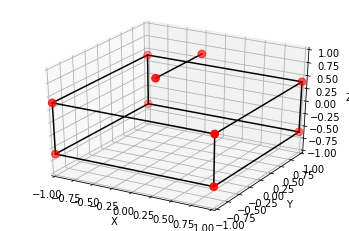

In [133]:
mechanics(r_0, r, masses, q_0, p_0, time, tmax, num_times, body_lines, name = 'cube_y')

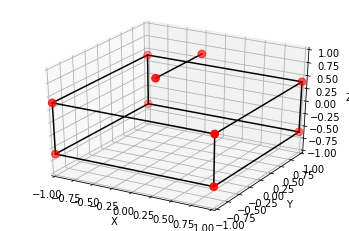

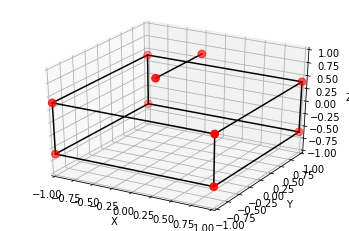

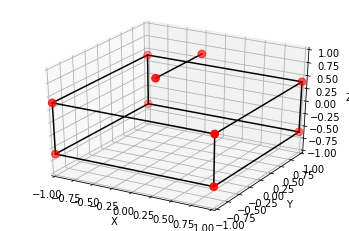

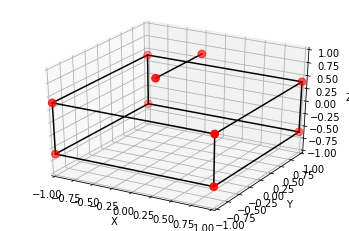

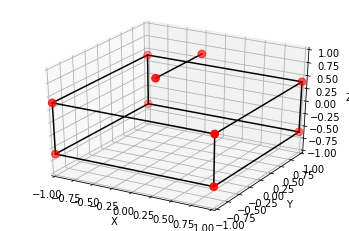

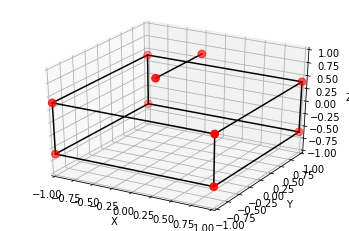

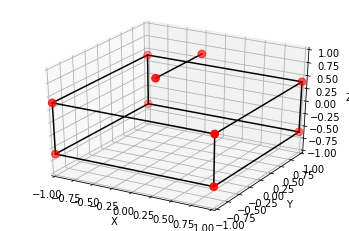

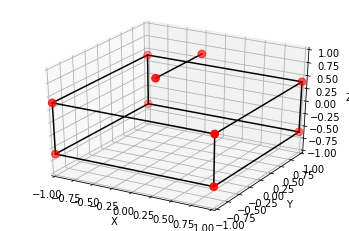

24.1 s ± 904 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
# %%timeit
# mechanics(r_0, r, masses, q_0, p_0, time, tmax, num_times, body_lines, name = 'cube_y')

In [127]:
cube = deformableBody(r_0, masses, p_0, body_lines)

In [128]:
r_0

array([[ 1. ,  1. ,  0. ],
       [ 1. , -1. ,  0. ],
       [-1. ,  1. ,  0. ],
       [-1. , -1. ,  0. ],
       [ 1. ,  1. , -1. ],
       [ 1. , -1. , -1. ],
       [-1. ,  1. , -1. ],
       [-1. , -1. , -1. ],
       [ 0. , -0.5,  0.5],
       [ 0. ,  0.5,  0.5]])

In [131]:
cube.r

array([[ 1.        ,  1.        ,  0.38888889],
       [ 1.        , -1.        ,  0.38888889],
       [-1.        ,  1.        ,  0.38888889],
       [-1.        , -1.        ,  0.38888889],
       [ 1.        ,  1.        , -0.61111111],
       [ 1.        , -1.        , -0.61111111],
       [-1.        ,  1.        , -0.61111111],
       [-1.        , -1.        , -0.61111111],
       [ 0.        , -0.5       ,  0.88888889],
       [ 0.        ,  0.5       ,  0.88888889]])

In [130]:
cube.translation_CM()

In [ ]:
mudar p para L0 e verificar
ri(t) = R(t) rid(t)
simular IcWc